# info-GAN

## Imports

### wandb (interactive cell)

In [ ]:
!pip -qqq install wandb pytorch-lightning torchmetrics

import wandb
from pytorch_lightning.loggers import WandbLogger

wandb.login()

# API Key:
# d926baa25b6a14ffa4e5c30a6f3bbffbeca8fcf1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 19.1 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

### Lightning

In [ ]:
try:
  import lightning.pytorch as pl
except:
  print("[!] Couldn't find pytorch-lightning.\nInstalling it...\n")
  !pip install lightning
  import lightning.pytorch as pl

[!] Couldn't find pytorch-lightning.
Installing it...

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.4/562.4 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from lightning.pytorch.utilities.model_summary import ModelSummary

In [ ]:
from pytorch_lightning import seed_everything

### standard imports

In [ ]:
import os
import shutil
import pathlib

from PIL import Image
import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

from torch.utils.data import DataLoader, random_split
from torch.utils.data import Dataset

import torchvision
from torchvision import datasets

In [ ]:
import torchvision.transforms as T
from torchvision.transforms import Compose, ToTensor, Resize
from torchvision.utils import make_grid

### Albumentations

In [ ]:
try:
  import albumentations as A
  from albumentations.pytorch import ToTensorV2
except:
  print("[!] Couldn't find albumentations... installing it.")
  !pip install -U albumentations
  import albumentations as A
  from albumentations.pytorch import ToTensorV2

### Torchmetrics

In [ ]:
try:
  import torchmetrics
except:
  print(f"[!] Torchmetrics couldn't be imported.\nInstalling...")
  !pip install torchmetrics

### Custom Definitions

In [ ]:
# Folder Utilities ----------------------------

## Create dir if it doesn't exist
def create_dir(dir_name):
  if not os.path.exists(f'/content/{dir_name}'):
    os.mkdir(f'/content/{dir_name}')

## Delete dir: checkpoints
def delete_dir(dir_name):
  if os.path.isdir(f'/content/{dir_name}'):
    shutil.rmtree(f'/content/{dir_name}')

# ---------------------------------------------

## Config File, Seeds & Devices

In [ ]:
# Log this config file to wandb
CONFIG = dict(
    seed=42,
    DATA_ROOT = '/content/',
    BATCH_SIZE = 128,
    WORKERS = 2,
    IMG_SIZE = (28,28),
    NUM_EPOCHS = 20,
    num_z=62, # 74?
    lr = 1e-4,
    nc = 1,  
    disc_steps=1,
    checkpoint_path='/content/checkpoints/',
    num_dis_c = 1,
    dis_c_dim = 10,
    num_con_c = 2
    )

In [ ]:
seed_everything(CONFIG['seed'])

INFO:lightning_fabric.utilities.seed:Global seed set to 42


42

In [ ]:
# device = torch.device('cpu')
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

device

device(type='cuda')

In [ ]:
torch.set_default_tensor_type(torch.FloatTensor)

## Transforms

In [ ]:
# train_transform = A.Compose(
#     [
#         A.SmallestMaxSize(max_size=160),
#         A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
#         A.RandomCrop(height=128, width=128),
#         A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
#         A.RandomBrightnessContrast(p=0.5),
#         A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#         ToTensorV2(),
#     ]
# )

## Dataset & DataLoaders (use lightning's Data Module class this time)

In [ ]:
train_data = torchvision.datasets.MNIST(root="train_data", 
                                               train = True, 
                                               transform = ToTensor(), 
                                               target_transform = None, 
                                               download = True)

# test_data = torchvision.datasets.MNIST(root="test_data",
#                                               train=False, 
#                                               transform=ToTensor(), 
#                                               target_transform=False, 
#                                               download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 111529711.45it/s]

Extracting train_data/MNIST/raw/train-images-idx3-ubyte.gz to train_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 125529216.40it/s]


Extracting train_data/MNIST/raw/train-labels-idx1-ubyte.gz to train_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 65201815.77it/s]

Extracting train_data/MNIST/raw/t10k-images-idx3-ubyte.gz to train_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2270352.61it/s]


Extracting train_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to train_data/MNIST/raw



In [ ]:
print(len(train_data))

60000


In [ ]:
train_dataloader = DataLoader(train_data, batch_size=CONFIG['BATCH_SIZE'], shuffle=True)
# test_dataloader = DataLoader(test_data, batch_size=CONFIG['BATCH_SIZE'], shuffle=True)

## Sanity Visualizations

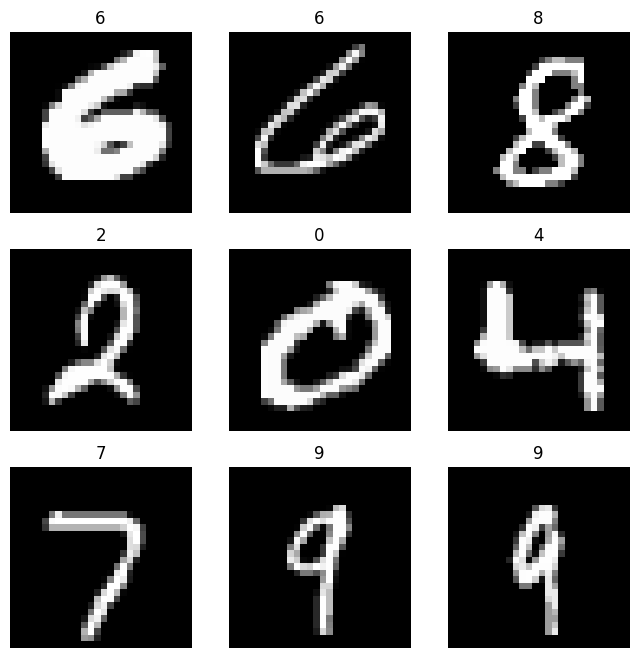

In [ ]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    # print(img.shape)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Model Arch

In [ ]:
from torchvision import models
from torchsummary import summary

### Discriminator


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 64, 4, 2, 1)

        self.conv2 = nn.Conv2d(64, 128, 4, 2, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(128)

        self.conv3 = nn.Conv2d(128, 1024, 7, bias=False)
        self.bn3 = nn.BatchNorm2d(1024)

    def forward(self, x):
        x = F.leaky_relu(self.conv1(x), 0.1, inplace=True)
        x = F.leaky_relu(self.bn2(self.conv2(x)), 0.1, inplace=True)
        x = F.leaky_relu(self.bn3(self.conv3(x)), 0.1, inplace=True)

        return x

In [ ]:
d = Discriminator().to(device)
summary(d, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 14, 14]           1,088
            Conv2d-2            [-1, 128, 7, 7]         131,072
       BatchNorm2d-3            [-1, 128, 7, 7]             256
            Conv2d-4           [-1, 1024, 1, 1]       6,422,528
       BatchNorm2d-5           [-1, 1024, 1, 1]           2,048
Total params: 6,556,992
Trainable params: 6,556,992
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.21
Params size (MB): 25.01
Estimated Total Size (MB): 25.22
----------------------------------------------------------------


### Generator

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.tconv1 = nn.ConvTranspose2d(74, 1024, 1, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(1024)

        self.tconv2 = nn.ConvTranspose2d(1024, 128, 7, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(128)

        self.tconv3 = nn.ConvTranspose2d(128, 64, 4, 2, padding=1, bias=False)
        self.bn3 = nn.BatchNorm2d(64)

        self.tconv4 = nn.ConvTranspose2d(64, 1, 4, 2, padding=1, bias=False)

    def forward(self, x):
        x = F.relu(self.bn1(self.tconv1(x)))
        x = F.relu(self.bn2(self.tconv2(x)))
        x = F.relu(self.bn3(self.tconv3(x)))

        img = torch.sigmoid(self.tconv4(x))

        return img

In [ ]:
g = Generator().to(device)
summary(g, (74, 1, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
   ConvTranspose2d-1           [-1, 1024, 1, 1]          75,776
       BatchNorm2d-2           [-1, 1024, 1, 1]           2,048
   ConvTranspose2d-3            [-1, 128, 7, 7]       6,422,528
       BatchNorm2d-4            [-1, 128, 7, 7]             256
   ConvTranspose2d-5           [-1, 64, 14, 14]         131,072
       BatchNorm2d-6           [-1, 64, 14, 14]             128
   ConvTranspose2d-7            [-1, 1, 28, 28]           1,024
Total params: 6,632,832
Trainable params: 6,632,832
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.31
Params size (MB): 25.30
Estimated Total Size (MB): 25.61
----------------------------------------------------------------


### Heads:

In [ ]:
class DHead(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv = nn.Conv2d(1024, 1, 1)

    def forward(self, x):
        output = torch.sigmoid(self.conv(x))

        return output

class QHead(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(1024, 128, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(128)

        self.conv_disc = nn.Conv2d(128, 10, 1)
        self.conv_mu = nn.Conv2d(128, 2, 1)
        self.conv_var = nn.Conv2d(128, 2, 1)

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.conv1(x)), 0.1, inplace=True)

        disc_logits = self.conv_disc(x).squeeze()

        mu = self.conv_mu(x).squeeze()
        var = torch.exp(self.conv_var(x).squeeze())

        return disc_logits, mu, var

## Lightning Recipe

In [ ]:
from itertools import chain

In [ ]:
# Source: https://github.com/Natsu6767/InfoGAN-PyTorch/blob/master/train.py 

class NormalNLLLoss:
    """
    Calculate the negative log likelihood
    of normal distribution.
    This needs to be minimised.

    Treating Q(cj | x) as a factored Gaussian.
    """
    def __call__(self, x, mu, var):
        
        logli = -0.5 * (var.mul(2 * np.pi) + 1e-6).log() - (x - mu).pow(2).div(var.mul(2.0) + 1e-6)
        nll = -(logli.sum(1).mean())

        return nll

In [ ]:
class LIT_infoGAN(pl.LightningModule):
  
  def __init__(self, 
               discriminator_model, 
               generator_model, 
               netD,
               netQ,
               latent_dim: int = 62, 
               lr: float = 0.003, 
               b1: float = 0.5,
               b2: float = 0.999,
               disc_steps: int = 1):
    
    super().__init__()
    self.save_hyperparameters(ignore=[discriminator_model, generator_model])
    self.automatic_optimization = False

    self.discriminator = discriminator_model
    self.netD = netD
    self.generator = generator_model
    self.netQ = netQ
    
    # Loss for discrimination between real & fake 
    self.criterionD = nn.BCELoss().to(device)
    # Loss for discrete latent code
    self.criterionQ_dis = nn.CrossEntropyLoss().to(device)
    # Loss for continuous latent code
    self.criterionQ_con = NormalNLLLoss()
  
  def configure_optimizers(self):
    lr = self.hparams.lr
    b1 = self.hparams.b1
    b2 = self.hparams.b2

    gen_params = chain(self.generator.parameters(), self.netQ.parameters())
    disc_params = chain(self.discriminator.parameters(), self.netD.parameters())

    optim_d = optim.Adam(disc_params, lr=lr, betas=(b1,b2))
    optim_g = optim.Adam(gen_params, lr=lr, betas=(b1,b2))

    return [optim_g, optim_d], []


  def forward(self, z):
    return self.generator(z)
 

  def test_step(self, batch, batch_idx): # Use for Exploring the latent space 
    imgs, _ = batch
    pass

  def noise_sample(self, n_dis_c, dis_c_dim, n_con_c, n_z, batch_size, device):
    z = torch.randn(batch_size, n_z, 1, 1, device=device)

    idx = np.zeros((n_dis_c, batch_size))
    if(n_dis_c != 0):
        dis_c = torch.zeros(batch_size, n_dis_c, dis_c_dim, device=device)
        
        for i in range(n_dis_c):
            idx[i] = np.random.randint(dis_c_dim, size=batch_size)
            dis_c[torch.arange(0, batch_size), i, idx[i]] = 1.0

        dis_c = dis_c.view(batch_size, -1, 1, 1)

    if(n_con_c != 0):
        # Random uniform between -1 and 1.
        con_c = torch.rand(batch_size, n_con_c, 1, 1, device=device) * 2 - 1

    noise = z
    if(n_dis_c != 0):
        noise = torch.cat((z, dis_c), dim=1)
    if(n_con_c != 0):
        noise = torch.cat((noise, con_c), dim=1)

    return noise, idx

  def training_step(self, batch, batch_idx):
    real_data, _ = batch
    real_data = real_data.to(device)
 
    b_size = real_data.size(0)

    

    # print(f"{batch_idx}:: imgs.shape =",imgs.shape)
    opt_g, opt_d = self.optimizers()

    z = torch.randn(100, self.hparams.latent_dim, 1, 1) # N x Z_d x 1 x 1
    z = z.type_as(real_data)

    fixed_noise = z
    if(CONFIG['num_dis_c'] != 0):
      idx = np.arange(CONFIG['dis_c_dim']).repeat(10)
      dis_c = torch.zeros(100, CONFIG['num_dis_c'], CONFIG['dis_c_dim'], device=device)

      for i in range(CONFIG['num_dis_c']):
        dis_c[torch.arange(0, 100), i, idx] = 1.0

      dis_c = dis_c.view(100, -1, 1, 1)

      fixed_noise = torch.cat((fixed_noise, dis_c), dim=1)

    if(CONFIG['num_con_c'] != 0):
      con_c = torch.rand(100, CONFIG['num_con_c'], 1, 1, device=device) * 2 - 1
      fixed_noise = torch.cat((fixed_noise, con_c), dim=1)

    real_label = 1
    fake_label = 0

    # Upd Disc & DHead:
    self.toggle_optimizer(opt_d)

    label = torch.full((b_size, ), real_label, device=device)

    output1 = self.discriminator(real_data)
    probs_real = self.netD(output1).view(-1)
    loss_real = self.criterionD(probs_real, label.float())

    # Fake data
    label.fill_(fake_label)
    noise, idx = self.noise_sample(CONFIG['num_dis_c'], 
                                   CONFIG['dis_c_dim'], 
                                   CONFIG['num_con_c'], 
                                   CONFIG['num_z'], 
                                   b_size, 
                                   device)
    fake_data = self.generator(noise)
    output2 = self.discriminator(fake_data.detach())
    probs_fake = self.netD(output2).view(-1)
    loss_fake = self.criterionD(probs_fake, label.float())
 
    # Net Loss for the discriminator
    D_loss = loss_real + loss_fake

    # Calculate gradients.
    self.manual_backward(D_loss)
    opt_d.step()
    opt_d.zero_grad()

    self.untoggle_optimizer(opt_d)

    # Train Gen & QHead:
    self.toggle_optimizer(opt_g)
    
    # Fake data treated as real.
    output = self.discriminator(fake_data)
    label.fill_(real_label)
    probs_fake = self.netD(output).view(-1)
    gen_loss = self.criterionD(probs_fake, label.float())

    q_logits, q_mu, q_var = self.netQ(output)
    target = torch.LongTensor(idx).to(device)
    # Calculating loss for discrete latent code.
    dis_loss = 0
    for j in range(CONFIG['num_dis_c']):
      dis_loss += self.criterionQ_dis(q_logits[:, j*10 : j*10 + 10], target[j])

    # Calculating loss for continuous latent code.
    con_loss = 0
    if (CONFIG['num_con_c'] != 0):
      con_loss = self.criterionQ_con(noise[:, CONFIG['num_z']+ CONFIG['num_dis_c']*CONFIG['dis_c_dim'] : ].view(-1, CONFIG['num_con_c']), q_mu, q_var)*0.1

    # Net loss for generator.
    G_loss = gen_loss + dis_loss + con_loss
    # Calculate gradients.
    self.manual_backward(G_loss)
    opt_g.step()
    opt_g.zero_grad()

    self.untoggle_optimizer(opt_g)
    
    self.logger.experiment.log({"Gen_Image_1 (during training)":[wandb.Image(fake_data[0].cpu(), caption="Gen Out")]})
    self.log_dict({"g_loss": G_loss, "d_loss": D_loss, "continuous_loss": con_loss, "discrete_loss": dis_loss}, 
                  on_step=True, 
                  on_epoch=True, 
                  prog_bar=True, 
                  logger=True)


In [ ]:
infogan = LIT_infoGAN(
      discriminator_model = Discriminator(), 
      generator_model = Generator(), 
      netQ = QHead(),
      netD = DHead(),
      latent_dim = CONFIG['num_z'],
      lr=CONFIG['lr']
    )

summary = ModelSummary(infogan, max_depth=-1)
print(summary)

   | Name                | Type             | Params
----------------------------------------------------------
0  | discriminator       | Discriminator    | 6.6 M 
1  | discriminator.conv1 | Conv2d           | 1.1 K 
2  | discriminator.conv2 | Conv2d           | 131 K 
3  | discriminator.bn2   | BatchNorm2d      | 256   
4  | discriminator.conv3 | Conv2d           | 6.4 M 
5  | discriminator.bn3   | BatchNorm2d      | 2.0 K 
6  | netD                | DHead            | 1.0 K 
7  | netD.conv           | Conv2d           | 1.0 K 
8  | generator           | Generator        | 6.6 M 
9  | generator.tconv1    | ConvTranspose2d  | 75.8 K
10 | generator.bn1       | BatchNorm2d      | 2.0 K 
11 | generator.tconv2    | ConvTranspose2d  | 6.4 M 
12 | generator.bn2       | BatchNorm2d      | 256   
13 | generator.tconv3    | ConvTranspose2d  | 131 K 
14 | generator.bn3       | BatchNorm2d      | 128   
15 | generator.tconv4    | ConvTranspose2d  | 1.0 K 
16 | netQ                | QHead        

## Logger: Proj, Run ... Names

In [ ]:
wandb_logger = WandbLogger(project='M6-infoGAN', 
                           name='exp-2_20epochs',
                           config=CONFIG,
                           job_type='train',
                           log_model="all")

## Trainer Callbacks

In [ ]:
from pytorch_lightning import Callback
from lightning.pytorch.callbacks import DeviceStatsMonitor, TQDMProgressBar, ModelCheckpoint, EarlyStopping, LearningRateMonitor

# Checkpoint
checkpoint_callback = ModelCheckpoint(dirpath=CONFIG['checkpoint_path'],
                                      filename='{epoch}-{g_loss:.3f}',
                                      monitor='g_loss',
                                      save_top_k=-1,
                                      save_last=True,
                                      save_weights_only=True,
                                      verbose=True,
                                      mode='min')

# Exp2: Learning Rate Monitor
lr_monitor = LearningRateMonitor(logging_interval='step', log_momentum=False)

# Earlystopping
# earlystopping = EarlyStopping(monitor='val_d_acc', patience=3, mode='min')

## Trainer

In [ ]:
trainer = pl.Trainer(fast_dev_run=False,    # For debugging purposes
                     log_every_n_steps=1,   # set the logging frequency
                     accelerator='auto',    # Precedence: tpu > gpu >> cpu
                     devices="auto",        # all
                     max_epochs= 5,         # CONFIG['NUM_EPOCHS'],
                     callbacks=[TQDMProgressBar(refresh_rate=25), 
                                checkpoint_callback, 
                                lr_monitor],
                     logger=wandb_logger,    # wandb <3
                     )

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


## Training

In [ ]:
trainer.fit(infogan, train_dataloader)

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name           | Type             | Params
----------------------------------------------------
0 | discriminator  | Discriminator    | 6.6 M 
1 | netD           | DHead            | 1.0 K 
2 | generator      | Generator        | 6.6 M 
3 | netQ           | QHead            | 133 K 
4 | criterionD     | BCELoss          | 0     
5 | criterionQ_dis | CrossEntropyLoss | 0     
----------------------------------------------------
13.3 M    Trainable params
0         Non-trainable params
13.3 M    Total params
53.296    Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name           | Type             | Params
----------------------------------------------------
0 | discriminator  | Discriminator    | 6.6 M 
1 | netD           | DHead            | 1.0 K 
2 | generator      | Generator        | 6.6 M 
3 | netQ

Training: 0it [00:00, ?it/s]

INFO: Epoch 0, global step 938: 'g_loss' reached 4.08702 (best 4.08702), saving model to '/content/checkpoints/epoch=0-g_loss=4.087.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 938: 'g_loss' reached 4.08702 (best 4.08702), saving model to '/content/checkpoints/epoch=0-g_loss=4.087.ckpt' as top 1
INFO: Epoch 1, global step 1876: 'g_loss' reached 5.37750 (best 4.08702), saving model to '/content/checkpoints/epoch=1-g_loss=5.378.ckpt' as top 2
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 1876: 'g_loss' reached 5.37750 (best 4.08702), saving model to '/content/checkpoints/epoch=1-g_loss=5.378.ckpt' as top 2
INFO: Epoch 2, global step 2814: 'g_loss' reached 6.26841 (best 4.08702), saving model to '/content/checkpoints/epoch=2-g_loss=6.268.ckpt' as top 3
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 2814: 'g_loss' reached 6.26841 (best 4.08702), saving model to '/content/checkpoints/epoch=2-g_loss=6.268.ckpt' as top 3
INF

## Call Finish on Exp logger

In [ ]:
wandb.finish()

continuous_loss_epoch,█▃▂▁▁
continuous_loss_step,█▆▅▄▃▃▂▃▂▂▃▂▄▂▂▂▂▂▃▂▃▃▂▂▂▂▂▃▂▂▂▂▃▂▂▁▁▁▁▂
d_loss_epoch,█▂▁▁▁
d_loss_step,█▇▅▄▄▃▂▂▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
discrete_loss_epoch,█▃▂▁▁
discrete_loss_step,█▆▆▅▅▄▄▃▃▄▃▄▃▃▃▃▃▂▂▃▂▂▂▂▃▂▃▂▂▃▃▂▁▂▃▂▁▂▂▁
epoch,▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆████████
g_loss_epoch,▁▄▆▇█
g_loss_step,▁▁▁▂▂▃▃▃▃▄▄▅▄▅▅▅▅▆▆▅▅▆▆▆▇▆▆▇▇▇▇▇▇█▇▇▇███
lr-Adam,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr-Adam-1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
